## NYC DEMAND PLOTTING

* with sd by hours of the day
* by days of the week
* by days of the week in hours

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [31]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [32]:
df.to_csv('KPI_resultsNYC.csv')
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

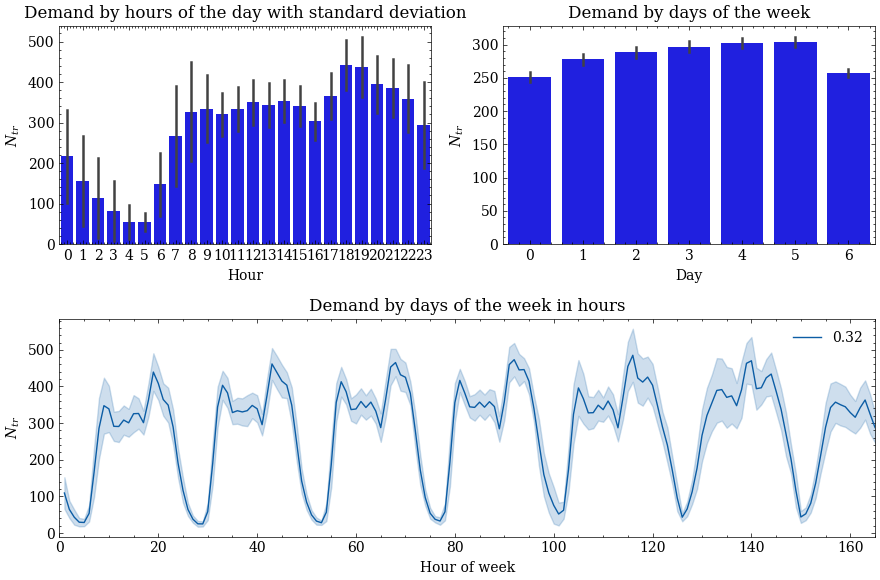

In [55]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(9, 6))
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2) 


ax=ax1
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
sns.barplot(data = to_plot, x = df.Start_time.dt.hour, y="Trips", ax = ax, errorbar="sd", color='blue')
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel('Hour') #the hour of the day
ax1.set_ylabel('$N_{tr}$') #the number of trips/hour
ax1.set_title("Demand by hours of the day with standard deviation")

ax=ax2
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
sns.barplot(data = to_plot, x = df.Start_time.dt.dayofweek, y="Trips", ax = ax, color='blue')
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel('Day') #the day of the week
ax2.set_ylabel('$N_{tr}$') #the number of trips/hour
ax2.set_title("Demand by days of the week")


ax=ax3
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
df['Hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df#[(df.Start_time.dt.dayofweek * 24 + (df.Start_time.dt.hour + 1))]
    sns.lineplot(data = to_plot, x = 'hour_of_week', y = 'Trips', ax = ax, label = d, errorbar ='sd')
ax3.set_xlim(0,165)
ax3.set_xlabel('Hour of week')
ax3.set_ylabel('$N_{tr}$')
ax3.set_title("Demand by days of the week in hours")

fig.tight_layout()